In [6]:
%matplotlib inline

import matplotlib.pyplot as pyplot
import math

class Unit:
    def __init__(self, sight, bclimit):
        self.sight = sight
        self.bclimit = bclimit

UNITS = {
    'Archon': Unit(35, 20000),
    'Scout': Unit(53, 20000),
    'Soldier': Unit(24, 10000),
    'Guard': Unit(24, 10000),
    'Viper': Unit(24, 10000),
    'Turret': Unit(24, 10000),
    'TTM': Unit(24, 10000)
}

def delay_reduction(bytecode_limit):
    x = xrange(0,bytecode_limit+1)
    y = [1.0 - 0.3 * math.pow(max(0., U + 8000. - bytecode_limit)/8000.,1.5) for U in x]
    return x, y

def signal_delay(sight_range, max_range, unsquare=False):
    if unsquare:
        x = xrange(1, int(math.sqrt(max_range))+1)
        y = [max(0, 0.05 + 0.03*(pow(xval,2)/sight_range - 2)) for xval in x]
    else:
        x = xrange(1, max_range+1)
        y = [max(0, 0.05 + 0.03*(xval/sight_range - 2)) for xval in x]
    return x, y

# Delays

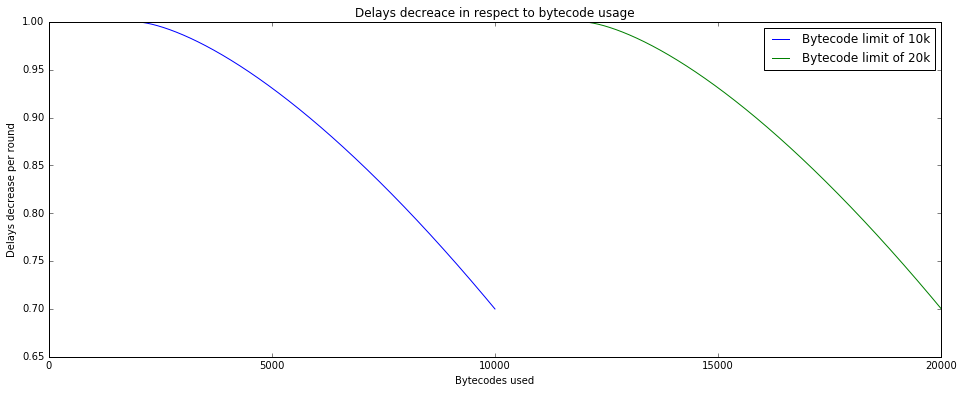

In [2]:
bclimits = set()
pyplot.figure(figsize=[16,6])

for name in UNITS:
    bclimits.add(UNITS[name].bclimit)
    
for bclimit in bclimits:
    x, y = delay_reduction(bclimit)
    pyplot.plot(x, y, label='Bytecode limit of '+str(bclimit/1000)+'k')  
    
pyplot.title('Delays decreace in respect to bytecode usage')
    
pyplot.xlabel('Bytecodes used')
pyplot.ylabel('Delays decrease per round')

pyplot.legend(loc=0)

pyplot.show()

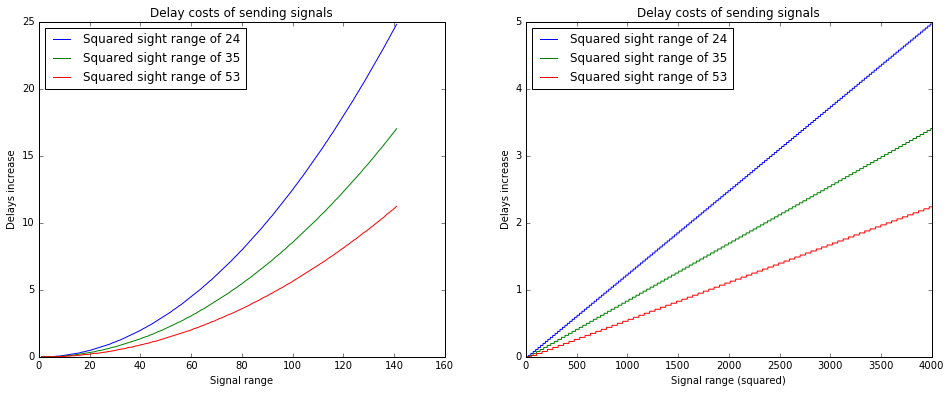

In [7]:
sight_ranges = set()

for name in UNITS:
    sight_ranges.add(UNITS[name].sight)

pyplot.figure(figsize=[16,6])
    
for sight in sight_ranges:
    pyplot.subplot(121)
    x, y = signal_delay(sight, max_range=20000, unsquare=True) 
    pyplot.plot(x, y, label='Squared sight range of '+str(sight))
    
    pyplot.subplot(122)
    x, y = signal_delay(sight, max_range=4000) 
    pyplot.plot(x, y, label='Squared sight range of '+str(sight))

pyplot.subplot(121)    
pyplot.title('Delay costs of sending signals')
pyplot.xlabel('Signal range')
pyplot.ylabel('Delays increase')
pyplot.legend(loc=0)

pyplot.subplot(122)    
pyplot.title('Delay costs of sending signals')
pyplot.xlabel('Signal range (squared)')
pyplot.ylabel('Delays increase')
pyplot.legend(loc=0)

pyplot.show()